In [ ]:
# Linear regression - basic
# Components of the regression equation
# Influential and outlier observations

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math


Sample Data Points:
(5, 85)
(4, 103)
(6, 70)
(5, 82)
(5, 89)

Potential Outliers (Std Residuals > ±2):
Empty DataFrame
Columns: [x, y, Residuals, Std Residuals, Leverage, Cook’s Distance, DFFITS, DFBETAS]
Index: []

Potential High Leverage Points (Leverage > 2(k+1)/n):
   x    y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
8  2  169  14.054054       1.816671  0.621622         2.710954  2.758638   

   DFBETAS  
8 -2.54895  

Potential Influential Points (Cook’s Distance > 4/n):
   x    y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
8  2  169  14.054054       1.816671  0.621622         2.710954  2.758638   

   DFBETAS  
8 -2.54895  


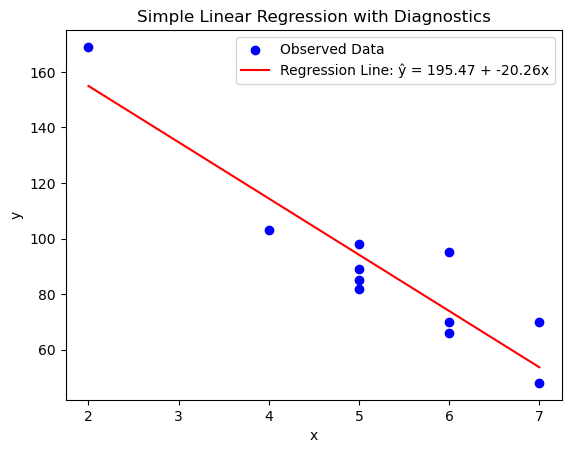

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     52.38
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           4.88e-05
Time:                        20:10:00   Log-Likelihood:                -42.355
No. Observations:                  11   AIC:                             88.71
Df Residuals:                       9   BIC:                             89.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.4685     15.240     12.826      0.0

C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:

def simple_linear_regression_with_diagnostics(x, y, show_points=False):
    """
    Perform simple linear regression and check for influential & outlier observations.
    
    Parameters:
    x (array-like): Independent variable
    y (array-like): Dependent variable
    show_points (bool): If True, prints some (x, y) data points

    Returns:
    model: Fitted regression model
    summary: Regression summary results
    influence_df: DataFrame containing diagnostics (residuals, Cook’s distance, leverage, etc.)
    """
    # Convert to NumPy arrays (if not already)
    x = np.array(x)
    y = np.array(y)

    # Optionally display some data points
    if show_points:
        print("\nSample Data Points:")
        for i in range(min(5, len(x))):  # Show up to 5 points
            print(f"({x[i]}, {y[i]})")

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions
    y_pred = model.predict(X)
    residuals = y - y_pred  # Compute residuals

    # Influence measures
    influence = model.get_influence()
    standardized_residuals = influence.resid_studentized_internal  # Standardized residuals
    leverage = influence.hat_matrix_diag  # Leverage values
    cooks_d = influence.cooks_distance[0]  # Cook’s Distance
    dffits = influence.dffits[0]  # DFFITS
    dfbetas = influence.dfbetas[:, 1]  # DFBETAS for slope

    # Create a DataFrame for diagnostics
    influence_df = pd.DataFrame({
        "x": x, "y": y, 
        "Residuals": residuals,
        "Std Residuals": standardized_residuals,
        "Leverage": leverage,
        "Cook’s Distance": cooks_d,
        "DFFITS": dffits,
        "DFBETAS": dfbetas
    })

    # Print a warning for potential outliers and influential points
    print("\nPotential Outliers (Std Residuals > ±2):")
    print(influence_df[np.abs(influence_df["Std Residuals"]) > 2])

    print("\nPotential High Leverage Points (Leverage > 2(k+1)/n):")
    leverage_threshold = 2 * (2 / len(x))  # (k+1) = 2 (intercept + slope)
    print(influence_df[influence_df["Leverage"] > leverage_threshold])

    print("\nPotential Influential Points (Cook’s Distance > 4/n):")
    cooks_threshold = 4 / len(x)
    print(influence_df[influence_df["Cook’s Distance"] > cooks_threshold])

    # Generate regression plot
    x_range = np.linspace(min(x), max(x), 100)
    y_range = model.params[0] + model.params[1] * x_range

    plt.scatter(x, y, color='blue', label='Observed Data')
    plt.plot(x_range, y_range, color='red', label=f'Regression Line: ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Simple Linear Regression with Diagnostics')
    plt.legend()
    plt.show()

    # Return model, summary, and influence diagnostics
    return model, model.summary(), influence_df

# Example dataset
x_values = [5,4,6,5,5,5,6,6,2,7,7]
y_values = [85,103,70,82,89,98,66,95,169,70,48]

# Run regression analysis with diagnostics
model, summary, influence_df = simple_linear_regression_with_diagnostics(x_values, y_values, show_points=True)

# Display summary
print(summary)



Sample Data Points:
(5.0, 125)
(7.5, 175)
(15.0, 325)
(20.0, 425)
(22.5, 475)


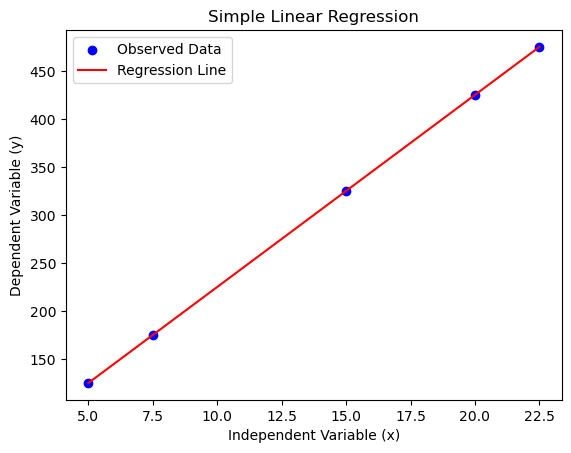

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.006e+30
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           1.97e-46
Time:                        18:53:12   Log-Likelihood:                 142.30
No. Observations:                   5   AIC:                            -280.6
Df Residuals:                       3   BIC:                            -281.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0000   1.39e-13    1.8e+14      0.0

C:\Users\Rashawn\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [3]:
# Perform simple linear regression using Ordinary Least Squares (OLS)

#     Parameters:
#     x (array-like): Independent variable
#     y (array-like): Dependent variable 
#     show_points (bool): If True, displays a few (x, y) data points.
#     Returns:
#     model: Fitted regression model
#     summary: Regression summary results

def simple_linear_regression(x, y, show_points=False):
   
    # Convert to NumPy arrays (if not already)
    x = np.array(x)
    y = np.array(y)

    # Optionally display some data points
    if show_points:
        print("\nSample Data Points:")
        for i in range(min(5, len(x))):  # Show up to 5 points
            print(f"({x[i]}, {y[i]})")

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions
    y_pred = model.predict(X)

    # Plot the data and regression line
    plt.scatter(x, y, label='Observed Data', color='blue')
    plt.plot(x, y_pred, label='Regression Line', color='red')
    plt.xlabel('Independent Variable (x)')
    plt.ylabel('Dependent Variable (y)')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()

    # Return model and summary
    return model, model.summary()

# Example usage
x_values = [5.0, 7.5, 15.0, 20.0, 22.5]  # Independent variable (Time in hours)
y_values = [125, 175, 325, 425, 475]     # Dependent variable (Cost in $)

# Run regression analysis with data points displayed
model, summary = simple_linear_regression(x_values, y_values, show_points=True)

# Print regression summary
print(summary)

b0 = 1.0
b1 = 1.0


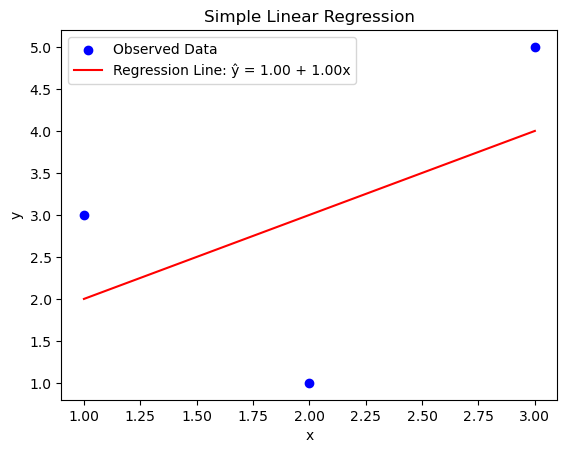

In [13]:
# components of the regression equation

# Define the dataset
x = np.array([1, 2, 3])
y = np.array([3, 1, 5])

# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute Sxx, Sxy, and Syy
Sxx = np.sum((x - x_mean) ** 2)
Sxy = np.sum((x - x_mean) * (y - y_mean))
Syy = np.sum((y - y_mean) ** 2)

# Compute regression coefficients
b1 = Sxy / Sxx  # Slope
b0 = y_mean - b1 * x_mean  # Intercept

# Display results
print(f'b0 = {b0}\nb1 = {b1}')


# Format and print the regression equation
regression_equation = f"ŷ = {b0:.2f} + {b1:.2f}x"
regression_equation


# Generate predicted y values
y_pred = b0 + b1 * x

# Create the scatter plot
plt.scatter(x, y, color='blue', label='Observed Data')

# Plot the regression line
plt.plot(x, y_pred, color='red', label=f'Regression Line: {regression_equation}')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()

# Show the plot
plt.show()


b0 = 195.46846846846844
b1 = -20.261261261261257


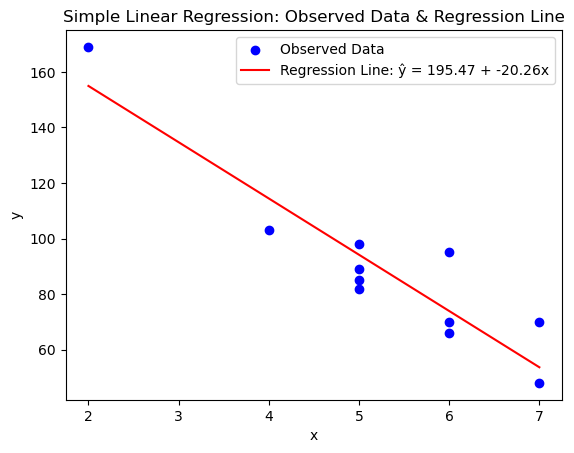

In [15]:
# regression example
# Define the new dataset
x_new = np.array([5, 4, 6, 5, 5, 5, 6, 6, 2, 7, 7])
y_new = np.array([85, 103, 70, 82, 89, 98, 66, 95, 169, 70, 48])

# Compute the means
x_mean_new = np.mean(x_new)
y_mean_new = np.mean(y_new)

# Compute Sxx, Sxy, and Syy
Sxx_new = np.sum((x_new - x_mean_new) ** 2)
Sxy_new = np.sum((x_new - x_mean_new) * (y_new - y_mean_new))
Syy_new = np.sum((y_new - y_mean_new) ** 2)

# Compute regression coefficients
b1_new = Sxy_new / Sxx_new  # Slope
b0_new = y_mean_new - b1_new * x_mean_new  # Intercept

# Display results
Sxx_new, Sxy_new, Syy_new, b1_new, b0_new

# Display results
print(f'b0 = {b0_new}\nb1 = {b1_new}')

# Generate predicted y values for plotting
x_range = np.linspace(min(x_new), max(x_new), 100)  # Create a smooth range of x values
y_range = b0_new + b1_new * x_range  # Compute corresponding y values

# Create the scatter plot for observed data
plt.scatter(x_new, y_new, color='blue', label='Observed Data')

# Plot the regression line
plt.plot(x_range, y_range, color='red', label=f'Regression Line: ŷ = {b0_new:.2f} + {b1_new:.2f}x')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression: Observed Data & Regression Line')
plt.legend()

# Show the plot
plt.show()